### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
import pandas as pd
data = pd.read_csv('amazon.csv', encoding='iso-8859-1')
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 6454, Columns: 5


year        int64
state      object
month      object
number    float64
date       object
dtype: object

### Check For Duplicate Data and Drop Them

In [ ]:
data.duplicated().any()
data.drop_duplicates(inplace=True)

np.False_

### Check Null Values In The Dataset


In [15]:
data.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

### Rename Month Names To English

In [ ]:
data['month_new'] = data['month'].map({
    'Janeiro': 'Jan',
    'Fevereiro': 'Feb',
    'Março': 'Mar',
    'Abril': 'Apr',
    'Maio': 'May',
    'Junho': 'Jun',
    'Julho': 'July',
    'Agosto': 'Aug',
    'Setembro': 'Sep',
    'Outubro': 'Oct',
    'Novembro': 'Nov',
    'Dezembro': 'Dec'    
})

,month,month_new
0,Janeiro,Jan
1,Janeiro,Jan
2,Janeiro,Jan
3,Janeiro,Jan
4,Janeiro,Jan
...,...,...
6449,Dezembro,Dec
6450,Dezembro,Dec
6451,Dezembro,Dec
6452,Dezembro,Dec


### Total Number of Fires Registered

In [23]:
data.shape

(6422, 6)

### In Which Month Maximum Number of Forest Fires Were Reported?

In [27]:
data.nlargest(1, 'number')[['number', 'month']]

,number,month
888,998.0,Setembro


### In Which Year Maximum Number of Forest Fires Was Reported?

In [37]:
data.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


### In Which State Maximum Number of Forest Fires Was Reported?

In [36]:
data.groupby('state')['number'].sum().reset_index()

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


### Find Total Number of Fires Were Reported In Amazonas

In [40]:
data[data['state'] == 'Amazonas']['number'].sum()

np.float64(30650.129)

### Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [44]:
data[data['state'] == 'Amazonas'].groupby('year')['number'].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


### Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [49]:
### Display Number of Fires Were Reported In Amazonas (Day-Wise)
data[data['state'] == 'Amazonas'].groupby('date')['number'].sum().reset_index()

,date,number
0,1998-01-01,946.000
1,1999-01-01,1061.000
2,2000-01-01,853.000
3,2001-01-01,1297.000
4,2002-01-01,2852.000
5,2003-01-01,1524.268
6,2004-01-01,2298.207
7,2005-01-01,1657.128
8,2006-01-01,997.640
9,2007-01-01,589.601


### Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

<Axes: xlabel='month_new', ylabel='number'>

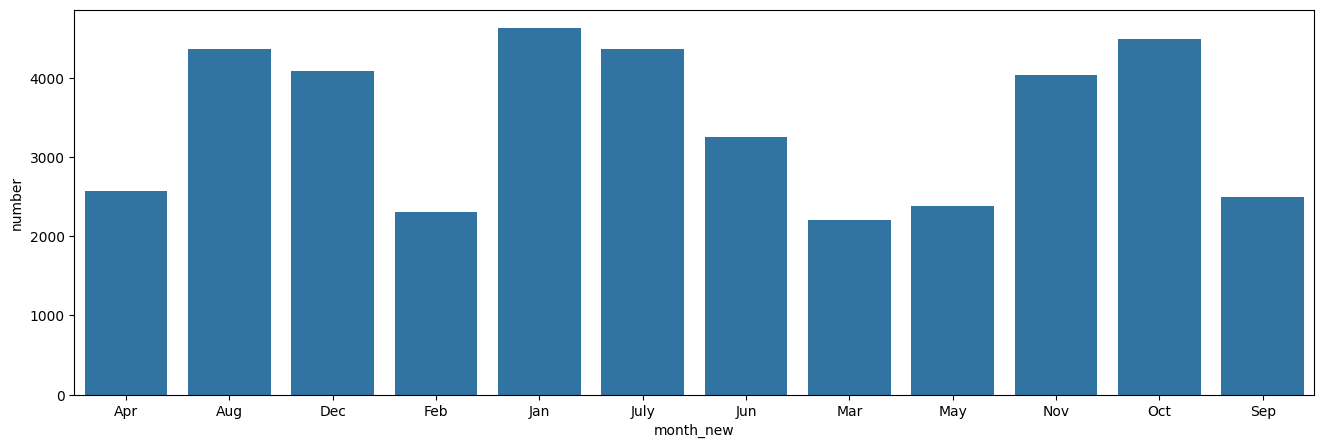

In [62]:
# data[data['year'] == 2015][['number']].sum()
fire = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
sns.barplot(x='month_new', y='number', data=fire)

### Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [ ]:
data.groupby('state')['number'].mean().reset_index().sort_values(by='number', ascending=False)

,state,number
20,Sao Paulo,213.896226
10,Mato Grosso,203.479975
4,Bahia,187.222703
15,Piau,158.174674
8,Goias,157.721841
11,Minas Gerais,156.800243
22,Tocantins,141.037176
3,Amazonas,128.243218
5,Ceara,127.314071
12,Paraiba,111.073979


### To Find The State Names Where Fires Were Reported In 'dec' Month

In [71]:
data[data['month_new'] == 'Dec']['state'].unique()


array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)